## Example- Real Data Analysis

#### Exploratory Data Analysis

In [6]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [7]:
# Reading files

files = os.listdir("C:\\Users\\user\\Dropbox\\PC\\Desktop\\dev\\Python DSA\\Sales_Data")
# Sales_April_2019.csv


In [8]:
# Combining all csv files into single csv

master_df = pd.DataFrame()
for i in files:
    df = pd.read_csv(os.path.join('C:\\Users\\user\\Dropbox\\PC\\Desktop\\dev\\Python DSA\\Sales_Data',i))
    master_df = pd.concat([master_df,df])

In [9]:
df = master_df.copy()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
df.dropna(inplace = True)
df.shape

(186305, 6)

In [12]:
# For example
s = "Shivam Singh"

l = s.split(' ')
l

['Shivam', 'Singh']

In [13]:
# we can see above example is a list so 

l[0] # if I want to acces shivam we will use index value 0

'Shivam'

In [14]:
l[1] # similarly if I want to acces singh we will use index value 1

'Singh'

In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [16]:
date = []
time = []

for i in df['Order Date']:
    d = i.split(' ')[0]
    t = i.split(' ')[1]
    date.append(d)
    time.append(t)
    
df['Date'] = date
df['Time'] = time
df.drop('Order Date', axis = 1, inplace = True)

In [17]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30
3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27


In [18]:
# if the length of string of any column is more or very less then we 
# can't perform above split operation

# To get rid off from this problem we will use following method

index = df[df.Date.str.len() < 8].index
df.drop(index, inplace = True)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30
3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27


In [19]:
df.shape

(182735, 7)

In [20]:
day = []
month = []
year = []

for i in df['Date']:
    d = i.split('/')[1]
    m = i.split('/')[0]
    y = i.split('/')[2]
    day.append(d)
    month.append(m)
    year.append(y)
    
df['Day'] = day
df['month'] = month
df['Year'] = year
df.drop('Date', axis = 1, inplace = True)  # axis = 1 for column and axis = 0 for row

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Time,Day,month,Year
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",08:46,19,04,19
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",22:30,07,04,19
3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",14:38,12,04,19
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",14:38,12,04,19
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",09:27,30,04,19


In [21]:
hour = []
min = []

for i in df['Time']:
    h = i.split(':')[0]
    m = i.split(':')[1]
    hour.append(h)
    min.append(m)
    
df['Hour'] = hour
df['Minute'] = min
df.drop('Time', axis = 1, inplace = True)

In [22]:
city = []

for i in df['Purchase Address']:
    c = i.split(',')[1]

    city.append(c)
    
df['City'] = city

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Day,month,Year,Hour,Minute,City
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",19,04,19,08,46,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",07,04,19,22,30,Boston
3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",12,04,19,14,38,Los Angeles
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",12,04,19,14,38,Los Angeles
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",30,04,19,09,27,Los Angeles


In [23]:
# Check data type first for all the columns always
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Purchase Address    object
Day                 object
month               object
Year                object
Hour                object
Minute              object
City                object
dtype: object

In [24]:
df.Year = '20' + df.Year

In [25]:
# convert Datatypes

df['Quantity Ordered'] = df['Quantity Ordered'].astype('float')
df['Price Each'] = df['Price Each'].astype('float')
df['Month'] = df['month'].astype('float')
df['Year'] = df['Year'].astype('float')
df['Day'] = df['Day'].astype('float')
df['Hour'] = df['Hour'].astype('float')
df['Minute'] = df['Minute'].astype('float')

In [26]:
# Create Sales Columns

df['Sales'] = df['Quantity Ordered'] + df['Price Each']

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Day,month,Year,Hour,Minute,City,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",19.0,04,2019.0,8.0,46.0,Dallas,4.0,13.95
2,176559,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",7.0,04,2019.0,22.0,30.0,Boston,4.0,100.99
3,176560,Google Phone,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",12.0,04,2019.0,14.0,38.0,Los Angeles,4.0,601.00
4,176560,Wired Headphones,1.0,11.99,"669 Spruce St, Los Angeles, CA 90001",12.0,04,2019.0,14.0,38.0,Los Angeles,4.0,12.99
5,176561,Wired Headphones,1.0,11.99,"333 8th St, Los Angeles, CA 90001",30.0,04,2019.0,9.0,27.0,Los Angeles,4.0,12.99


In [27]:
#df.Quantity Ordered    # we can't use due to space

df.columns = [x.replace(' ','_') for x in df.columns]  # To prevent from above problem we use this
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Purchase_Address,Day,month,Year,Hour,Minute,City,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",19.0,04,2019.0,8.0,46.0,Dallas,4.0,13.95
2,176559,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",7.0,04,2019.0,22.0,30.0,Boston,4.0,100.99
3,176560,Google Phone,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",12.0,04,2019.0,14.0,38.0,Los Angeles,4.0,601.00
4,176560,Wired Headphones,1.0,11.99,"669 Spruce St, Los Angeles, CA 90001",12.0,04,2019.0,14.0,38.0,Los Angeles,4.0,12.99
5,176561,Wired Headphones,1.0,11.99,"333 8th St, Los Angeles, CA 90001",30.0,04,2019.0,9.0,27.0,Los Angeles,4.0,12.99


what time should be display advertisement to maximise likelihood to the customers?

In [28]:
sales_hourly = pd.DataFrame(df.groupby('Hour')['Sales'].sum()).sort_values(by = 'Sales',ascending = False)
sales_hourly

,Sales
Hour,
19.0,2370281.97
11.0,2269473.53
12.0,2266802.08
20.0,2243610.17
18.0,2178268.79
13.0,2116329.80
17.0,2085602.46
14.0,2045945.14
21.0,2014194.54


In [29]:
px.bar(data_frame = sales_hourly, x = sales_hourly.index, y = sales_hourly.sales, title = 'Hourly product Sales')

# plotly is not installed perfectly that's why it's creating problem to print output

NameError: name 'px' is not defined

In [30]:
df.corr() # pearson correlation method


,Quantity_Ordered,Price_Each,Day,Year,Hour,Minute,Month,Sales
Quantity_Ordered,1.000000,-0.148130,0.001235,0.002512,-0.002136,0.001790,0.001025,-0.146827
Price_Each,-0.148130,1.000000,-0.002156,0.002698,0.001736,-0.002153,-0.003476,0.999999
Day,0.001235,-0.002156,1.000000,-0.022925,-0.002540,-0.002372,0.016711,-0.002155
Year,0.002512,0.002698,-0.022925,1.000000,-0.032395,-0.001655,-0.023615,0.002701
Hour,-0.002136,0.001736,-0.002540,-0.032395,1.000000,-0.015295,0.001532,0.001734
Minute,0.001790,-0.002153,-0.002372,-0.001655,-0.015295,1.000000,-0.001947,-0.002151
Month,0.001025,-0.003476,0.016711,-0.023615,0.001532,-0.001947,1.000000,-0.003475
Sales,-0.146827,0.999999,-0.002155,0.002701,0.001734,-0.002151,-0.003475,1.000000


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

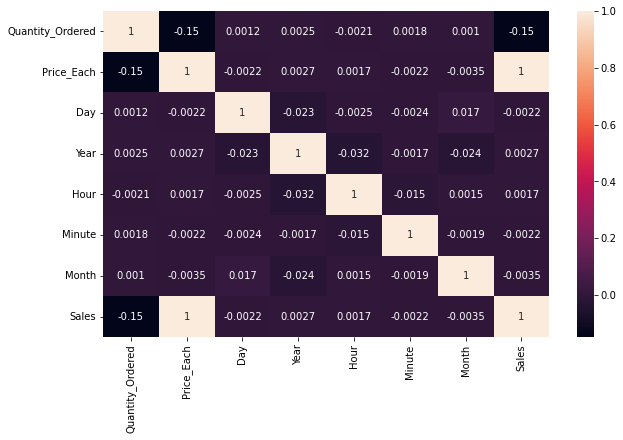

In [32]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True)

# Feature Engineering